Authors: Anushree Lahane

### This Jupyter Notebook file runs a linear regression algorithm on ____ data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Loading the data
all_df=pd.read_csv('real_estate_dataset/realest_data.csv', index_col=False)
all_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### Setting up the  features (X) and the target variable (y) 

In [3]:

X = all_df.drop(['Y house price of unit area'], axis=1)
y = all_df['Y house price of unit area']
#X = all_df [['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
#y = all_df['Y house price of unit area']

### Splitting the data into training and testing sets  (80% training, 20% testing)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale the Features

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initializing the Linear regression model

In [6]:
lr_model = LinearRegression()

### Hyperparameter tuning using GridSearchCV

In [7]:
param_grid = {
    'fit_intercept': [True, False],
}

In [8]:
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_model = grid_search.best_estimator_

### Predicting on the test data 

In [9]:
y_pred = best_model.predict(X_test_scaled)

### Calculating the mean squared error for model evaluation 

In [10]:
 #Calculates the MSE between the actual values and the predicted values
mse = mean_squared_error(y_test, y_pred)
r_squared = best_model.score(X_test_scaled, y_test) 

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"R-squared value is: {r_squared:.3f}")
print(f"Mean Squared Error is: {mse:.3f}")

Best Hyperparameters: {'fit_intercept': True}
R-squared value is: 0.681
Mean Squared Error is: 53.502


### Plotting the predicted vs actual values

C:\Users\hp\AppData\Local\Temp\ipykernel_4612\2649558005.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


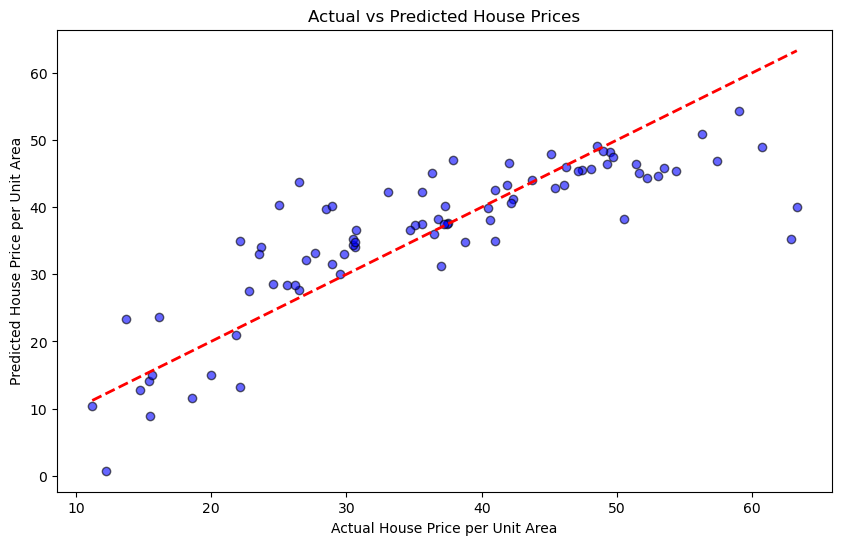

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual House Price per Unit Area')
plt.ylabel('Predicted House Price per Unit Area')
plt.title('Actual vs Predicted House Prices')
plt.show()

### Printing the coefficients

In [12]:
coefficients = pd.DataFrame(best_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                        Coefficient
X1 transaction date                        1.530451
X2 house age                              -3.062726
X3 distance to the nearest MRT station    -5.786979
X4 number of convenience stores            3.219002
X5 latitude                                2.855183
X6 longitude                              -0.441170


### Performing k-fold cross-validation

In [13]:
k = 5
cv_scores = cross_val_score(best_model, scaler.transform(X), y, cv=k, scoring='neg_mean_squared_error')


### Calculating the mean and standard deviation of MSE

In [14]:
mean_mse = -cv_scores.mean()  # converting negative MSE to positive
std_mse = cv_scores.std()

In [15]:
print(f"{k}-Fold Cross-Validation Mean MSE: {mean_mse:.3f}")
print(f"{k}-Fold Cross-Validation MSE Standard Deviation: {std_mse:.3f}")

5-Fold Cross-Validation Mean MSE: 78.332
5-Fold Cross-Validation MSE Standard Deviation: 31.199


### RESULTS 
The linear regression model explains 68.1% of the variation in house prices, with a reasonable Mean Squared Error of 53.502 and a higher cross-validation error of 78.332
